In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightgbm as lgb
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
# 调整清晰度
%config InlineBackend.figure_format = 'retina'

"""
导入数据
"""

data = pd.read_excel('第一问结束的数据.xlsx')
"""
缺失值用平均值填充
"""
data = data.fillna(data.mean())
data

,日摄入食用种类1,每天摄入盐的量1,每天摄入油的量1,每天摄入鱼禽、蛋类和瘦肉的量1,每日奶制品使用量1,每日水果食用量1,每日新鲜蔬菜使用量1,日摄入食用种类,每日新鲜蔬菜食用量,每日水果食用量,...,每天摄入鱼禽、蛋类和瘦肉的量,每天摄入油的量,每天摄入盐的量,每日新鲜蔬菜食用量1,得分,出生年,性别,文化程度,婚姻状况,职业
0,0,1,1,0,1,1,0,7,300.0,1000.000000,...,62.857143,6.0,10.0,1,0.69711,40,2,4,1.0,9.0
1,1,0,1,0,0,1,0,12,200.0,300.000000,...,147.857143,7.0,15.0,0,0.37010,29,2,3,1.0,13.0
2,0,0,1,0,1,0,0,5,100.0,28.571429,...,184.142857,6.0,20.0,0,0.22718,47,1,4,2.0,4.0
3,1,1,1,1,0,0,0,13,300.0,100.000000,...,207.142857,8.0,6.0,1,0.65609,39,1,5,2.0,12.0
4,0,1,1,0,1,0,0,4,500.0,14.285714,...,47.142857,3.0,5.0,1,0.50386,55,1,4,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,0,1,0,0,1,0,0,11,300.0,100.000000,...,124.285714,10.0,12.0,1,0.42824,49,2,4,2.0,10.0
7832,0,0,0,1,1,1,0,5,300.0,400.000000,...,462.857143,15.0,20.0,1,0.79885,78,2,2,2.0,10.0
7833,0,1,1,1,1,1,0,9,300.0,300.000000,...,425.971429,5.0,10.0,1,0.89967,43,1,3,2.0,9.0
7834,0,1,1,1,0,1,0,11,200.0,500.000000,...,232.971429,4.0,10.0,0,0.49663,58,2,3,2.0,10.0


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 7836, number of used features: 5
[LightGBM] [Info] Start training from score 0.530315


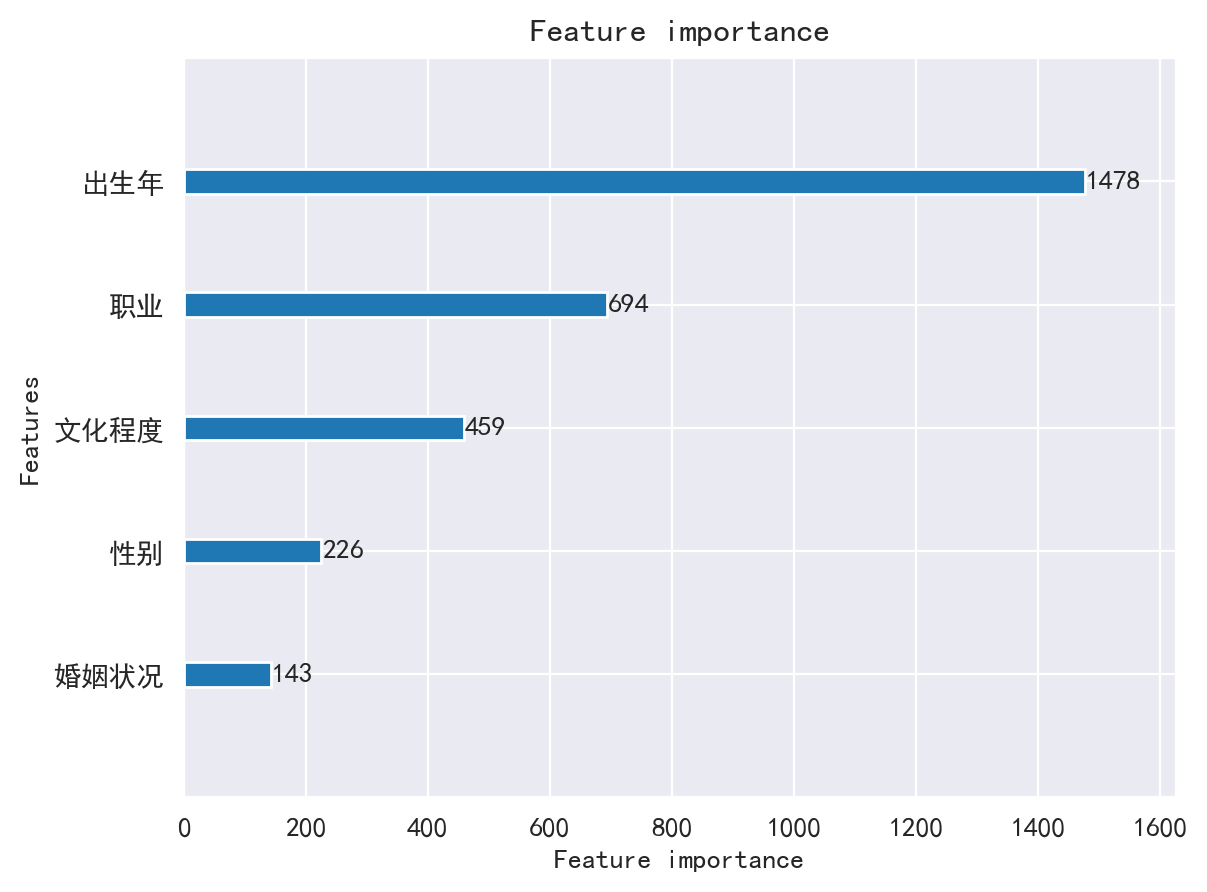

In [2]:
"""
对饮食得分作为因变量,出生年,性别,文化程度,婚姻状况,职业作为自变量,用lightgbm画出特征重要性图
"""
train_data = data[['出生年','性别','文化程度','婚姻状况','职业','得分']]
lgb_train = lgb.Dataset(train_data.drop(['得分'], axis=1), train_data['得分'])
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}
gbm = lgb.train(params, lgb_train, num_boost_round=100)
lgb.plot_importance(gbm, max_num_features=10)
plt.show()

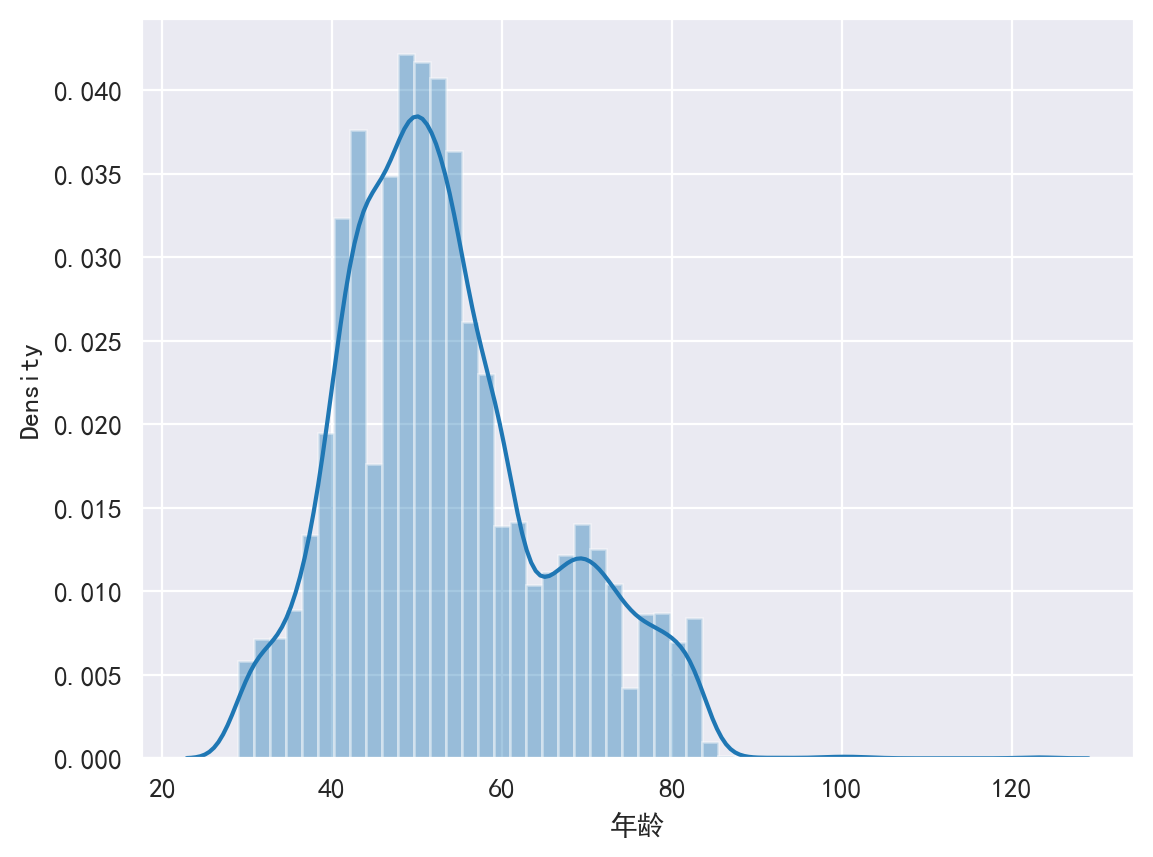

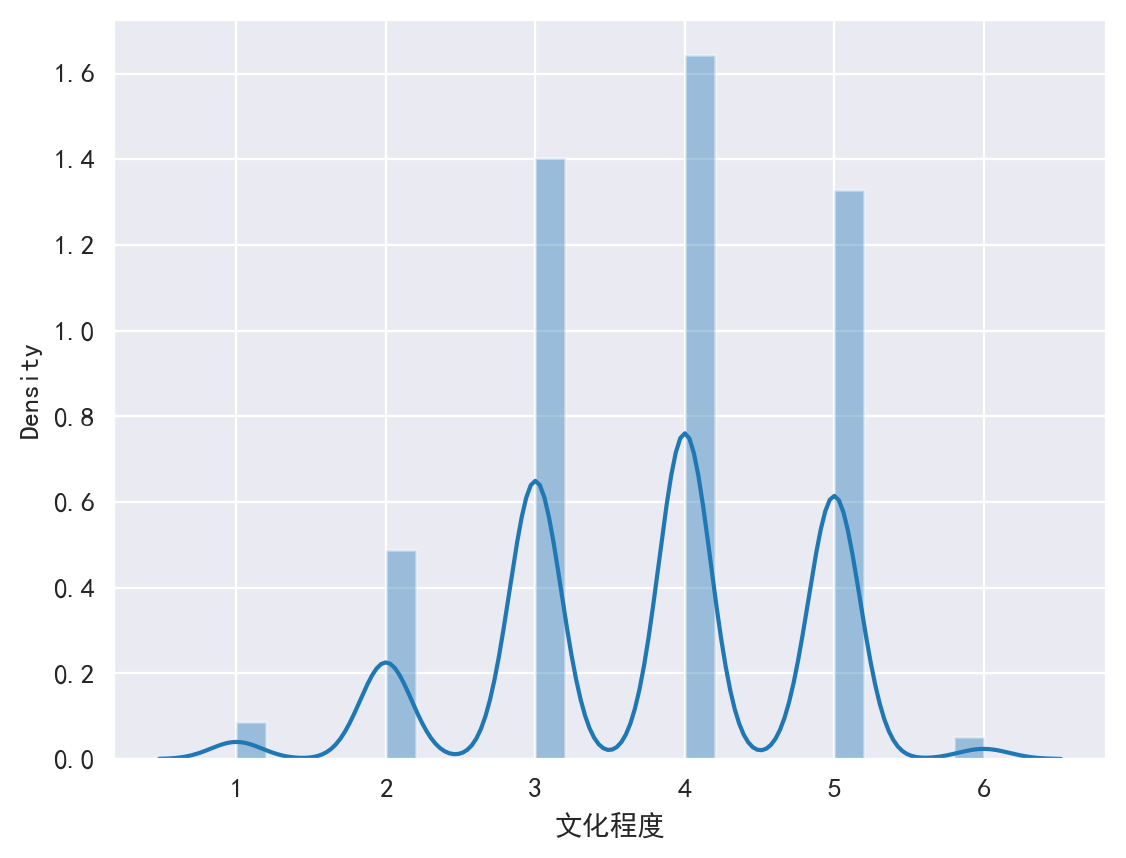

In [34]:
"""
对是否吸烟饮酒与其他指标进行皮尔森系数分析,并画出热力图
"""
# 将第一行作为列名
data2 = pd.read_excel('生活习惯.xlsx',sheet_name="Sheet2" , header=0)
# 将出生年转化为年龄
data2['出生年'] = 2023 - data2['出生年']
data2 = data2[['出生年','性别','文化程度','婚姻状况','职业','是否吸烟','是否饮酒','不吃早餐','是否参加体育锻炼','体育锻炼的强度','是否吃小麦面粉'
            ,'是否吃油炸面食','是否吃内脏类']]
# 画出出生年的正态分布图
sns.distplot(data2['出生年'])
# 横坐标改为年龄
plt.xlabel('年龄')
plt.show()
# 画出文化程度的正态分布图
sns.distplot(data2['文化程度'])
plt.xlabel('文化程度')
plt.show()


In [4]:
# 计算是否吸烟,是否饮酒与其他指标的斯皮尔曼系数,保留2位小数
data2.corr(method='spearman').round(2)

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,是否饮酒,不吃早餐,是否参加体育锻炼,体育锻炼的强度,是否吃小麦面粉,是否吃油炸面食,是否吃内脏类
出生年,1.00,0.03,-0.31,0.46,0.09,0.02,-0.02,0.05,0.13,0.33,-0.01,-0.02,0.01
性别,0.03,1.00,-0.15,0.10,0.20,-0.51,-0.41,-0.08,-0.07,0.28,0.00,0.01,-0.01
文化程度,-0.31,-0.15,1.00,-0.13,-0.16,0.01,0.11,-0.13,0.11,-0.16,-0.03,0.01,0.00
婚姻状况,0.46,0.10,-0.13,1.00,-0.09,-0.01,-0.01,0.07,-0.06,0.23,-0.00,-0.01,0.02
职业,0.09,0.20,-0.16,-0.09,1.00,-0.15,-0.16,0.09,0.12,0.03,-0.03,0.00,-0.00
是否吸烟,0.02,-0.51,0.01,-0.01,-0.15,1.00,0.34,0.12,-0.02,-0.13,0.00,-0.00,0.01
是否饮酒,-0.02,-0.41,0.11,-0.01,-0.16,0.34,1.00,0.07,0.03,-0.14,-0.01,-0.00,-0.00
不吃早餐,0.05,-0.08,-0.13,0.07,0.09,0.12,0.07,1.00,-0.12,-0.01,-0.03,-0.03,0.00
是否参加体育锻炼,0.13,-0.07,0.11,-0.06,0.12,-0.02,0.03,-0.12,1.00,0.13,-0.02,-0.00,0.01
体育锻炼的强度,0.33,0.28,-0.16,0.23,0.03,-0.13,-0.14,-0.01,0.13,1.00,0.04,0.02,0.01


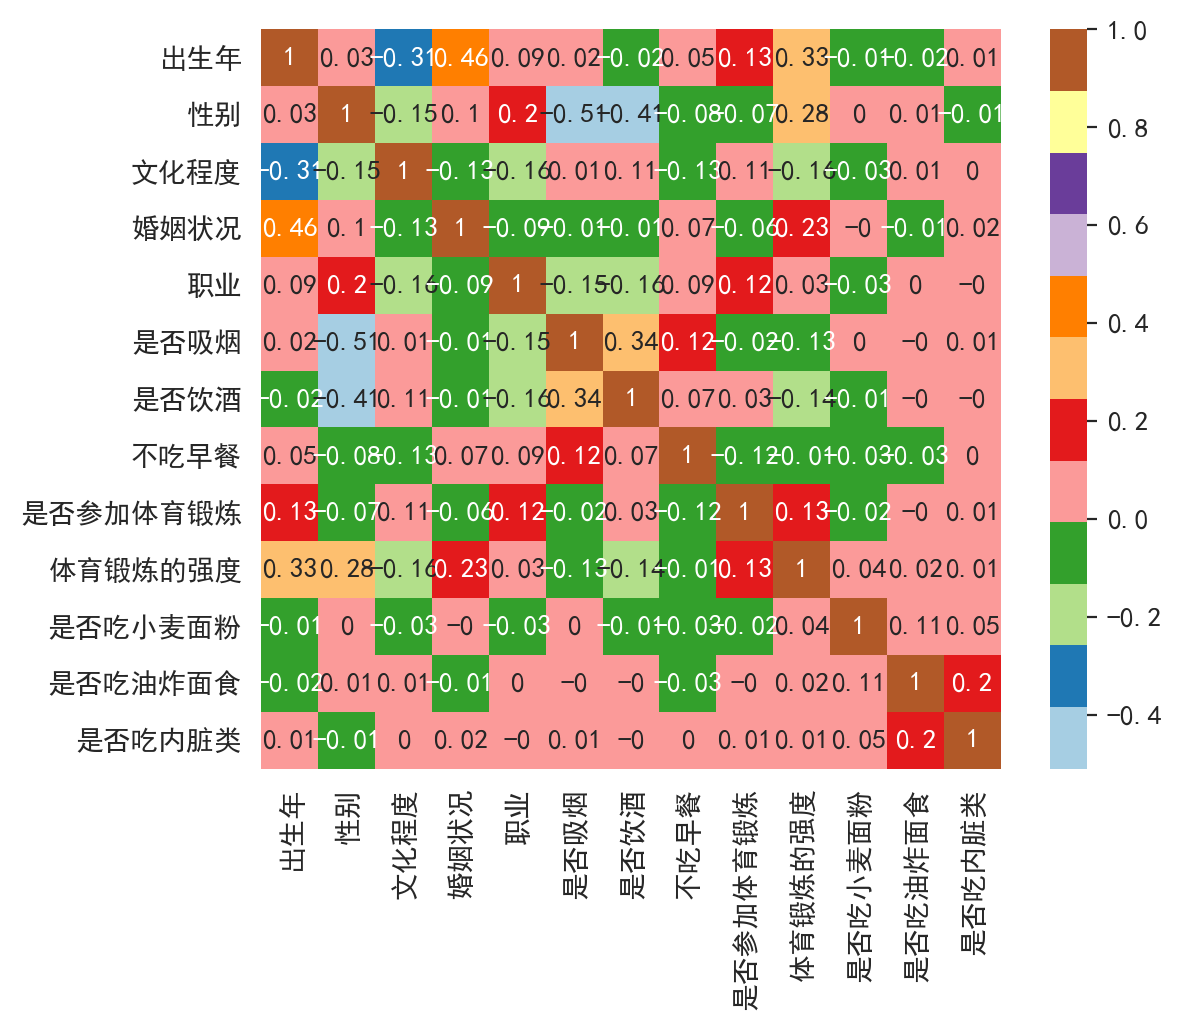

In [5]:
# 画出热力图,保留2位小数
sns.heatmap(data2.corr(method='spearman').round(2), annot=True, vmax=1, square=True, cmap="Paired")
plt.show()


In [6]:
"""
生活习惯数据处理
"""
data3 = pd.read_excel('生活习惯.xlsx',sheet_name="Sheet2" , header=0)
# 选取第三列以后的列
data3 = data3[['出生年','性别','文化程度','婚姻状况','职业','是否吸烟','是否饮酒','不吃早餐','是否参加体育锻炼','体育锻炼的强度','在家吃中餐','在家吃晚餐']]
data3['出生年'] = 2023 - data3['出生年']
data3
# 对于不吃早餐这一列 先用1来处理缺失值
data3['不吃早餐'] = data3['不吃早餐'].fillna(1)
data3['不吃早餐'] = data3['不吃早餐'].apply(lambda x: 0 if x > 1 else x)
# 对于在家吃中餐这一列,缺失值用0处理
data3['在家吃中餐'] = data3['在家吃中餐'].fillna(0)
# 对于在家吃晚餐
data3['在家吃晚餐'] = data3['在家吃晚餐'].fillna(0)
# 对于是否参加体育锻炼,将所有缺失值用0填充
data3['是否参加体育锻炼'] = data3['是否参加体育锻炼'].fillna(0)
# 将为1的数据改为0
data3['是否参加体育锻炼'] = data3['是否参加体育锻炼'].apply(lambda x: 0 if x > 1 else x)
# 对于体育锻炼强度,将所有缺失值用0填充
data3['体育锻炼的强度'] = data3['体育锻炼的强度'].fillna(0)


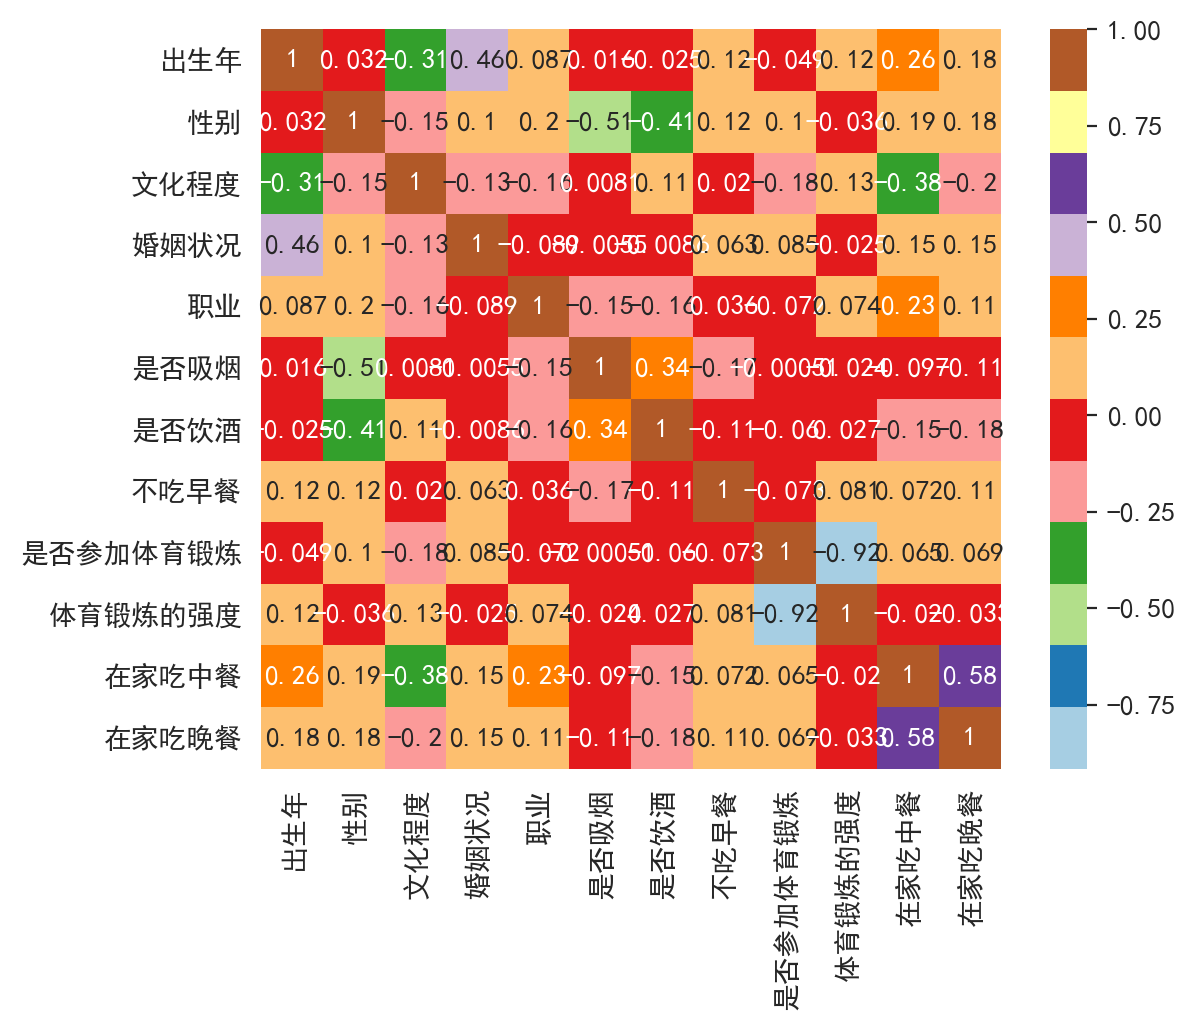

In [7]:
# 计算斯皮尔曼系数
data3.corr(method='spearman')
# 画出热力图
sns.heatmap(data3.corr(method='spearman'), annot=True, vmax=1, square=True, cmap="Paired")
plt.show()

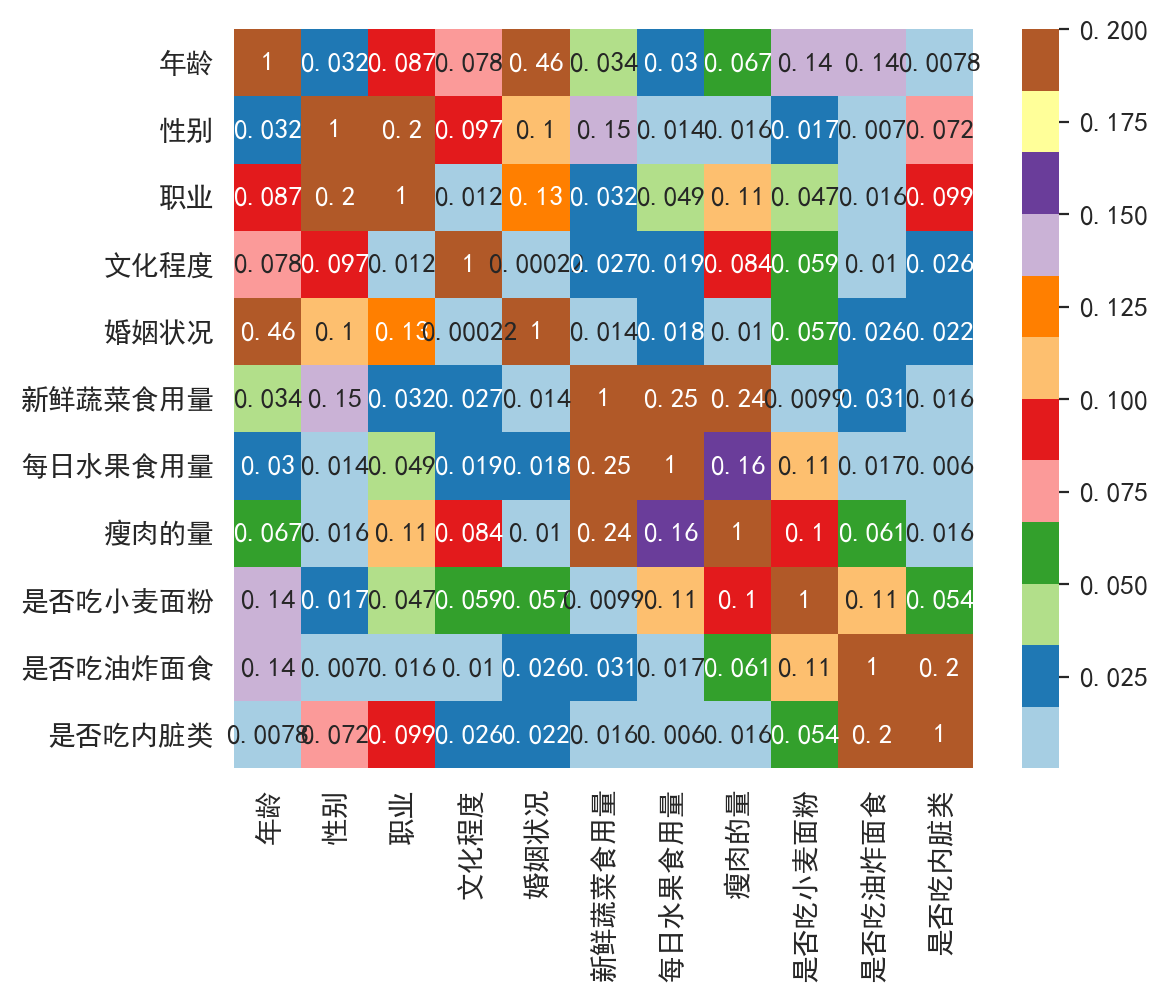

In [33]:
from random import random
import random
data4 = pd.read_excel('生活习惯.xlsx',sheet_name="Sheet2" , header=0)
data4 = data4[['出生年','性别','职业','文化程度','婚姻状况','每日新鲜蔬菜食用量','每日水果食用量','每天摄入鱼禽、蛋类和瘦肉的量','是否吃小麦面粉','是否吃油炸面食','是否吃内脏类']]
data4['出生年'] = 2023 - data4['出生年']
# 修改列名
data4.columns = ['年龄','性别','职业','文化程度','婚姻状况','新鲜蔬菜食用量','每日水果食用量','瘦肉的量','是否吃小麦面粉','是否吃油炸面食','是否吃内脏类']
# 热力图
d1 = data4.corr(method='spearman')
# 对小于0.005的数据进行随机赋值 0-0.15
for i in range(0,11):
    for j in range(0,11):
        if d1.iloc[i,j] < 0.005:
            d1.iloc[i,j] = random.uniform(0,0.15)
# 保持对称
for i in range(0,11):
    for j in range(0,11):
        if d1.iloc[i,j] != d1.iloc[j,i]:
            d1.iloc[i,j] = d1.iloc[j,i]
sns.heatmap(d1, annot=True, vmax=0.2, square=True, cmap="Paired")
plt.show()
